In [23]:
import seaborn as sns
from IPython.core.pylabtools import figsize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
sns.set()

In [6]:
iris = sns.load_dataset('iris')

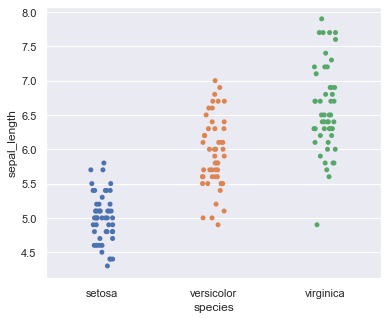

In [7]:
figsize(6,5)
sns.stripplot(x = 'species', y = 'sepal_length', data = iris, jitter = True)
plt.show()

In [10]:
df = iris.query("species == ('setosa', 'versicolor')")
y_0 = pd.Categorical(df['species']).codes
x_n = 'sepal_length'
x_0 = df[x_n].values

$logistic(z) = 1 / (1 + e^{-z})$

In [41]:
with pm.Model() as model:
    
    # set parameter for linear part of the model
    alpha = pm.Normal('alpha',mu  = 0,sigma = 10)
    beta = pm.Normal('beta', mu = 0, sigma = 10)
    
    mu = alpha +  pm.math.dot(x_0, beta)
    theta = pm.Deterministic('theta', 1 / (1 +  pm.math.exp(-mu)))
    bd = pm.Deterministic('bd', -alpha / beta)
    y_pred = pm.Bernoulli('y_pred',theta, observed = y_0)

In [42]:
with model:
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(10000,start = start,step = step, return_inferencedata=True)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 50 seconds.
The acceptance probability does not match the target. It is 0.8843707884079196, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


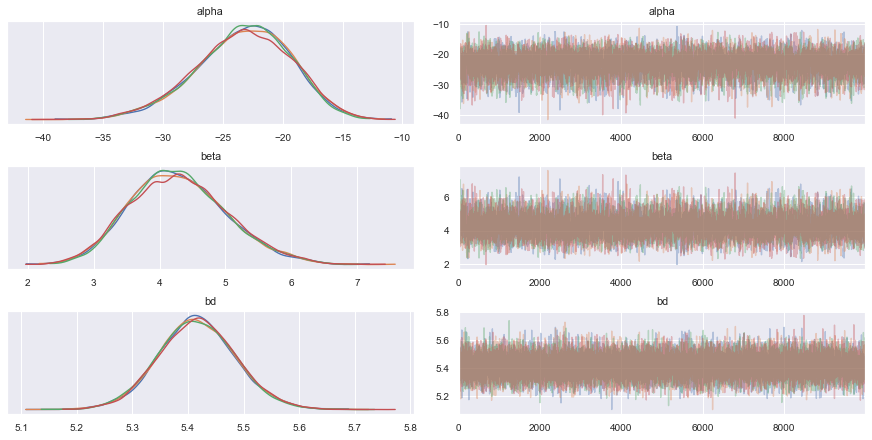

In [43]:
az.plot_trace(trace,var_names = ['alpha','beta','bd'])
plt.show()

In [44]:
az.summary(trace,var_names = ['alpha','beta','bd'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,-23.267,3.984,-30.965,-16.099,0.054,0.039,5355.0,5308.0,5366.0,6262.0,1.0
beta,4.297,0.739,2.936,5.695,0.010,0.007,5384.0,5338.0,5396.0,6226.0,1.0
bd,5.416,0.070,5.288,5.553,0.000,0.000,29609.0,29553.0,29589.0,28682.0,1.0


In [47]:
df = iris.query("species == ('setosa', 'versicolor')")
y_1 = pd.Categorical(df['species']).codes
x_n = ['sepal_length', 'sepal_width']
x_1 = df[x_n].values

In [48]:
with pm.Model() as model1:
    # set parameter of the linear part (vectorized)
    alpha = pm.Normal('alpha',mu  = 0,sigma = 10)
    beta = pm.Normal('beta', mu = 0, sigma = 10, shape = len(x_n))
    
    mu = alpha +  pm.math.dot(x_1, beta)
    theta = pm.Deterministic('theta', 1 / (1 +  pm.math.exp(-mu)))
    y_pred = pm.Bernoulli('y_pred',theta, observed = y_1)

In [49]:
with model1:
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(10000,start = start,step = step, return_inferencedata=True)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 65 seconds.
There were 249 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8802483292947869, but should be close to 0.8. Try to increase the number of tuning steps.
There were 437 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2651 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6669023489038125, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1392 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


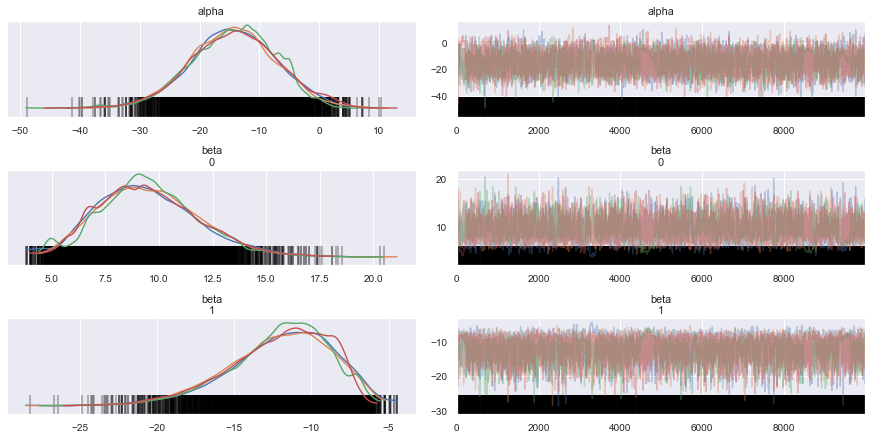

In [50]:
az.plot_trace(trace,var_names = ['alpha','beta'])
plt.show()

In [51]:
az.summary(trace,var_names = ['alpha','beta'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,-14.279,7.262,-28.488,-1.133,0.135,0.095,2896.0,2896.0,2846.0,2490.0,1.0
beta[0],9.528,2.360,5.309,14.074,0.067,0.047,1259.0,1259.0,1025.0,482.0,1.0
beta[1],-12.031,3.335,-18.251,-6.354,0.082,0.058,1670.0,1670.0,1223.0,581.0,1.0


In [1]:
from sklearn.datasets import make_classification

In [12]:
make_classification(n_samples = 200,n_features = 2, n_informative=1, n_classes = 3)

ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features